In [12]:
## 畫圖前置
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import requests
from pprint import pprint 
import re
import seaborn as sns

url = "https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_"
response = requests.get(url)
if response.status_code == 200:
    with open("TaipeiSansTCBeta-Regular.ttf", "wb") as file:
        file.write(response.content)
else:
    print("Download failed. Status code:", response.status_code)
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

list_2 = ["0","淡水漁人碼頭觀景平台","滬尾礮臺","綠野馬術文化園區","淡江大學","淡水金色水岸","淡水碼頭","小白宮"]
for i, site2 in enumerate(list_2):
    if i == 0: 
        continue
    data = pd.read_csv(f"/Users/chriskeng/Documents/112課程/資科導/期末專案/text_comment/All/{site2}.csv")
    globals()[f"{list_2[i]}_df"] = pd.DataFrame(data)

In [6]:
#list_2 = ["0","淡水漁人碼頭觀景平台","滬尾礮臺","綠野馬術文化園區","淡江大學","淡水金色水岸","淡水碼頭","小白宮"]
groups = 淡水漁人碼頭觀景平台_df.groupby(by='時間')
print(groups.size())

時間
1 個月前      15
1 年前       83
1 週前        4
10 個月前      3
11 個月前      1
2 個月前      14
2 天前        3
2 年前       60
2 週前        3
3 個月前      27
3 天前        1
3 年前      468
3 週前        2
4 個月前      10
4 年前      124
5 個月前       7
6 個月前       6
7 個月前      10
8 個月前       6
9 個月前       3
dtype: int64


WordCloud saved at: /Users/chriskeng/Documents/112課程/資科導/期末專案/時間分組/折線圖-一年到四年-1.jpg


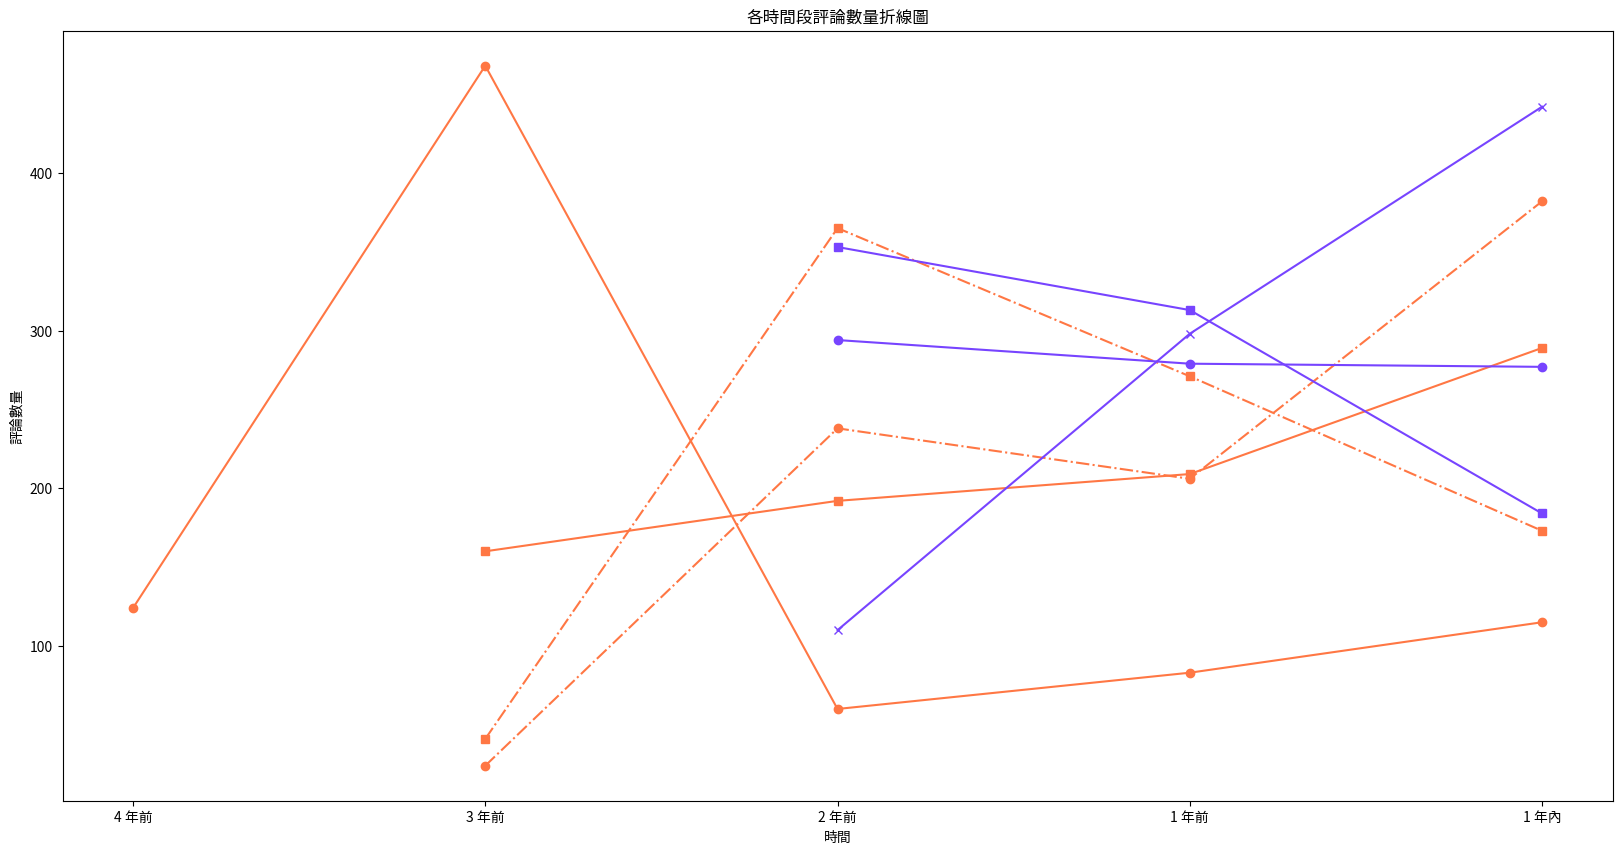

In [17]:
# 1年到四年
def map_time(time):
    if '分鐘前' in time or '小時前'in time or'天前' in time or '週前' in time or '月前' in time:
        return '1 年內'
    elif '年前' in time:  
        return time

plt.figure(figsize=(20, 10))
#list_2 = ["0","淡水漁人碼頭觀景平台","滬尾礮臺","綠野馬術文化園區","淡江大學","淡水金色水岸","淡水碼頭","小白宮"]
淡水漁人碼頭觀景平台_df['新時間'] = 淡水漁人碼頭觀景平台_df['時間'].apply(map_time)
group_1 = 淡水漁人碼頭觀景平台_df.groupby(by='新時間')
滬尾礮臺_df['新時間'] = 滬尾礮臺_df['時間'].apply(map_time)
group_2 = 滬尾礮臺_df.groupby(by='新時間')
綠野馬術文化園區_df['新時間'] = 綠野馬術文化園區_df['時間'].apply(map_time)
group_3 = 綠野馬術文化園區_df.groupby(by='新時間')
淡江大學_df['新時間'] = 淡江大學_df['時間'].apply(map_time)
group_4 = 淡江大學_df.groupby(by='新時間')
淡水金色水岸_df['新時間'] = 淡水金色水岸_df['時間'].apply(map_time)
group_5 = 淡水金色水岸_df.groupby(by='新時間')
淡水碼頭_df['新時間'] = 淡水碼頭_df['時間'].apply(map_time)
group_6 = 淡水碼頭_df.groupby(by='新時間')
小白宮_df['新時間'] =小白宮_df['時間'].apply(map_time)
group_7 = 小白宮_df.groupby(by='新時間')
#也需要更改
group_1_counts = group_1.size()
Count_1_df = group_1_counts.reset_index(name='Count')
group_2_counts = group_2.size()
Count_2_df = group_2_counts.reset_index(name='Count')
group_3_counts = group_3.size()
Count_3_df = group_3_counts.reset_index(name='Count')
group_4_counts = group_4.size()
Count_4_df = group_4_counts.reset_index(name='Count')
group_5_counts = group_5.size()
Count_5_df = group_5_counts.reset_index(name='Count')
group_6_counts = group_6.size()
Count_6_df = group_6_counts.reset_index(name='Count')
group_7_counts = group_7.size()
Count_7_df = group_7_counts.reset_index(name='Count')

# 注意value要對
custom_order = ["4 年前","3 年前","2 年前","1 年前","1 年內"]

Count_1_df['新時間'] = pd.Categorical(Count_1_df['新時間'], categories=custom_order, ordered=True)
Count_2_df['新時間'] = pd.Categorical(Count_2_df['新時間'], categories=custom_order, ordered=True)
Count_3_df['新時間'] = pd.Categorical(Count_3_df['新時間'], categories=custom_order, ordered=True)
Count_4_df['新時間'] = pd.Categorical(Count_4_df['新時間'], categories=custom_order, ordered=True)
Count_5_df['新時間'] = pd.Categorical(Count_5_df['新時間'], categories=custom_order, ordered=True)
Count_6_df['新時間'] = pd.Categorical(Count_6_df['新時間'], categories=custom_order, ordered=True)
Count_7_df['新時間'] = pd.Categorical(Count_7_df['新時間'], categories=custom_order, ordered=True)
# 按照指定順序排序
Count_1_df = Count_1_df.sort_values('新時間')
Count_2_df = Count_2_df.sort_values('新時間')
Count_3_df = Count_3_df.sort_values('新時間')
Count_4_df = Count_4_df.sort_values('新時間')
Count_5_df = Count_5_df.sort_values('新時間')
Count_6_df = Count_6_df.sort_values('新時間')
Count_7_df = Count_7_df.sort_values('新時間')
# 繪製折線圖
#list_2 = ["0","淡水漁人碼頭觀景平台","滬尾礮臺","綠野馬術文化園區","淡江大學","淡水金色水岸","淡水碼頭","小白宮"]
plt.plot(Count_1_df['新時間'], Count_1_df['Count'],color = "#FF7744", marker='o', linestyle='-')
plt.plot(Count_2_df['新時間'], Count_2_df['Count'],color = "#FF7744", marker='s', linestyle='-')
plt.plot(Count_3_df['新時間'], Count_3_df['Count'],color = "#FF7744", marker='o', linestyle='-.')
plt.plot(Count_4_df['新時間'], Count_4_df['Count'],color = "#FF7744", marker='s', linestyle='-.')

plt.plot(Count_5_df['新時間'], Count_5_df['Count'],color = "#7744FF", marker='o', linestyle='-')
plt.plot(Count_6_df['新時間'], Count_6_df['Count'],color = "#7744FF", marker='s', linestyle='-')
plt.plot(Count_7_df['新時間'], Count_7_df['Count'],color = "#7744FF", marker='x', linestyle='-')

# 設定標題及標籤
plt.title('各時間段評論數量折線圖')
plt.xlabel('時間')
plt.ylabel('評論數量')

file_name = "折線圖-一年到四年-1.jpg"
save_path = f"/Users/chriskeng/Documents/112課程/資科導/期末專案/時間分組/{file_name}"
# 保存為 JPG 格式
plt.savefig(save_path, format="jpg")
print(f"WordCloud saved at: {save_path}")

# 顯示圖表
plt.show()

WordCloud saved at: /Users/chriskeng/Documents/112課程/資科導/期末專案/時間分組/折線圖-一年到四年-2.jpg


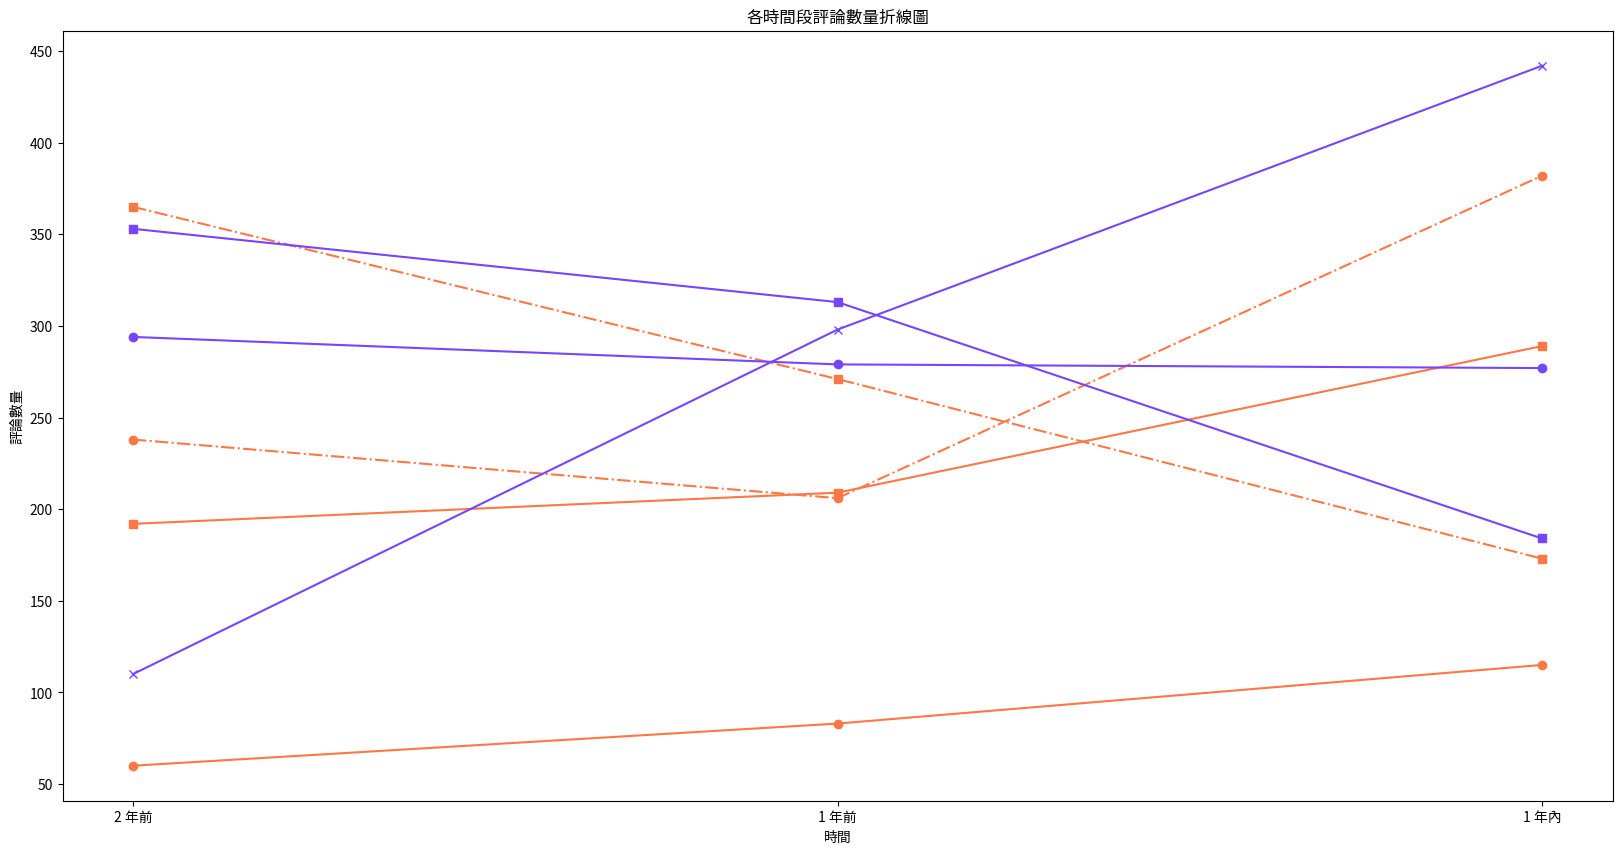

In [18]:
# 只畫0~3年
def map_time(time):
    if '分鐘前' in time or '小時前'in time or'天前' in time or '週前' in time or '月前' in time:
        return '1 年內'
    elif '1 年前' in time or '2 年前' in time:  
        return time
    else:
        return None

plt.figure(figsize=(20, 10))
#list_2 = ["0","淡水漁人碼頭觀景平台","滬尾礮臺","綠野馬術文化園區","淡江大學","淡水金色水岸","淡水碼頭","小白宮"]
淡水漁人碼頭觀景平台_df['新時間'] = 淡水漁人碼頭觀景平台_df['時間'].apply(map_time)
group_1 = 淡水漁人碼頭觀景平台_df.groupby(by='新時間')
滬尾礮臺_df['新時間'] = 滬尾礮臺_df['時間'].apply(map_time)
group_2 = 滬尾礮臺_df.groupby(by='新時間')
綠野馬術文化園區_df['新時間'] = 綠野馬術文化園區_df['時間'].apply(map_time)
group_3 = 綠野馬術文化園區_df.groupby(by='新時間')
淡江大學_df['新時間'] = 淡江大學_df['時間'].apply(map_time)
group_4 = 淡江大學_df.groupby(by='新時間')
淡水金色水岸_df['新時間'] = 淡水金色水岸_df['時間'].apply(map_time)
group_5 = 淡水金色水岸_df.groupby(by='新時間')
淡水碼頭_df['新時間'] = 淡水碼頭_df['時間'].apply(map_time)
group_6 = 淡水碼頭_df.groupby(by='新時間')
小白宮_df['新時間'] =小白宮_df['時間'].apply(map_time)
group_7 = 小白宮_df.groupby(by='新時間')
#也需要更改
group_1_counts = group_1.size()
Count_1_df = group_1_counts.reset_index(name='Count')
group_2_counts = group_2.size()
Count_2_df = group_2_counts.reset_index(name='Count')
group_3_counts = group_3.size()
Count_3_df = group_3_counts.reset_index(name='Count')
group_4_counts = group_4.size()
Count_4_df = group_4_counts.reset_index(name='Count')
group_5_counts = group_5.size()
Count_5_df = group_5_counts.reset_index(name='Count')
group_6_counts = group_6.size()
Count_6_df = group_6_counts.reset_index(name='Count')
group_7_counts = group_7.size()
Count_7_df = group_7_counts.reset_index(name='Count')

# 注意value要對
custom_order = ["2 年前","1 年前","1 年內"]

Count_1_df['新時間'] = pd.Categorical(Count_1_df['新時間'], categories=custom_order, ordered=True)
Count_2_df['新時間'] = pd.Categorical(Count_2_df['新時間'], categories=custom_order, ordered=True)
Count_3_df['新時間'] = pd.Categorical(Count_3_df['新時間'], categories=custom_order, ordered=True)
Count_4_df['新時間'] = pd.Categorical(Count_4_df['新時間'], categories=custom_order, ordered=True)
Count_5_df['新時間'] = pd.Categorical(Count_5_df['新時間'], categories=custom_order, ordered=True)
Count_6_df['新時間'] = pd.Categorical(Count_6_df['新時間'], categories=custom_order, ordered=True)
Count_7_df['新時間'] = pd.Categorical(Count_7_df['新時間'], categories=custom_order, ordered=True)
# 按照指定順序排序
Count_1_df = Count_1_df.sort_values('新時間')
Count_2_df = Count_2_df.sort_values('新時間')
Count_3_df = Count_3_df.sort_values('新時間')
Count_4_df = Count_4_df.sort_values('新時間')
Count_5_df = Count_5_df.sort_values('新時間')
Count_6_df = Count_6_df.sort_values('新時間')
Count_7_df = Count_7_df.sort_values('新時間')
# 繪製折線圖
#list_2 = ["0","淡水漁人碼頭觀景平台","滬尾礮臺","綠野馬術文化園區","淡江大學","淡水金色水岸","淡水碼頭","小白宮"]
plt.plot(Count_1_df['新時間'], Count_1_df['Count'],color = "#FF7744", marker='o', linestyle='-')
plt.plot(Count_2_df['新時間'], Count_2_df['Count'],color = "#FF7744", marker='s', linestyle='-')
plt.plot(Count_3_df['新時間'], Count_3_df['Count'],color = "#FF7744", marker='o', linestyle='-.')
plt.plot(Count_4_df['新時間'], Count_4_df['Count'],color = "#FF7744", marker='s', linestyle='-.')

plt.plot(Count_5_df['新時間'], Count_5_df['Count'],color = "#7744FF", marker='o', linestyle='-')
plt.plot(Count_6_df['新時間'], Count_6_df['Count'],color = "#7744FF", marker='s', linestyle='-')
plt.plot(Count_7_df['新時間'], Count_7_df['Count'],color = "#7744FF", marker='x', linestyle='-')

# 設定標題及標籤
plt.title('各時間段評論數量折線圖')
plt.xlabel('時間')
plt.ylabel('評論數量')

file_name = "折線圖-一年到四年-2.jpg"
save_path = f"/Users/chriskeng/Documents/112課程/資科導/期末專案/時間分組/{file_name}"
# 保存為 JPG 格式
plt.savefig(save_path, format="jpg")
print(f"WordCloud saved at: {save_path}")

# 顯示圖表
plt.show()